# Polynomial Regression (Fish Weight Prediction)

## Explanation

### Objective

Create a machine learning mode that can predict the weight of a fish, using the Polynomial Regression algorithm.

### Column Descriptions

- ***Species*** = This column represents the species of the fish. It is a categorical variable that categorizes each fish into one of seven species. The species may include names like "Perch," "Bream," "Roach," "Pike," "Smelt," "Parkki," and "Whitefish." This column is the target variable for the polynomial regression analysis, where we aim to predict the fish's weight based on its other attributes.
- ***Weight*** = This column represents the weight of the fish. It is a numerical variable that is typically measured in grams. The weight is the dependent variable we want to predict using polynomial regression.
- ***Length1*** = This column represents the first measurement of the fish's length. It is a numerical variable, typically measured in centimetres.
- ***Length2*** = This column represents the second measurement of the fish's length. It is another numerical variable, typically measured in centimetres.
- ***Length3*** = This column represents the third measurement of the fish's length. Similar to the previous two columns, it is a numerical variable, usually measured in centimetres.
- ***Height*** = This column represents the height of the fish. It is a numerical variable, typically measured in centimetres.
- ***Width*** = This column represents the width of the fish. Like the other numerical variables, it is also typically measured in centimetres.

## A. Data Preparation

### A.1 Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [4]:
try:
    df = pd.read_csv('Fish.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [5]:
df.shape

(159, 7)

### A.4 Viewing Data Informations

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### A.5 Viewing Data Statistics

In [7]:
df.describe().T.style.format("{:.4f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
Weight,159.0000,398.3264,357.9783,0.0000,120.0000,273.0000,650.0000,1650.0000
Length1,159.0000,26.2472,9.9964,7.5000,19.0500,25.2000,32.7000,59.0000
Length2,159.0000,28.4157,10.7163,8.4000,21.0000,27.3000,35.5000,63.4000
Length3,159.0000,31.2270,11.6102,8.8000,23.1500,29.4000,39.6500,68.0000
Height,159.0000,8.9710,4.2862,1.7284,5.9448,7.7860,12.3659,18.9570
Width,159.0000,4.4175,1.6858,1.0476,3.3857,4.2485,5.5845,8.1420


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [8]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [9]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


### A.7 Viewing Duplicated Data

In [10]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [11]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

### A.9 Viewing Outlier Data

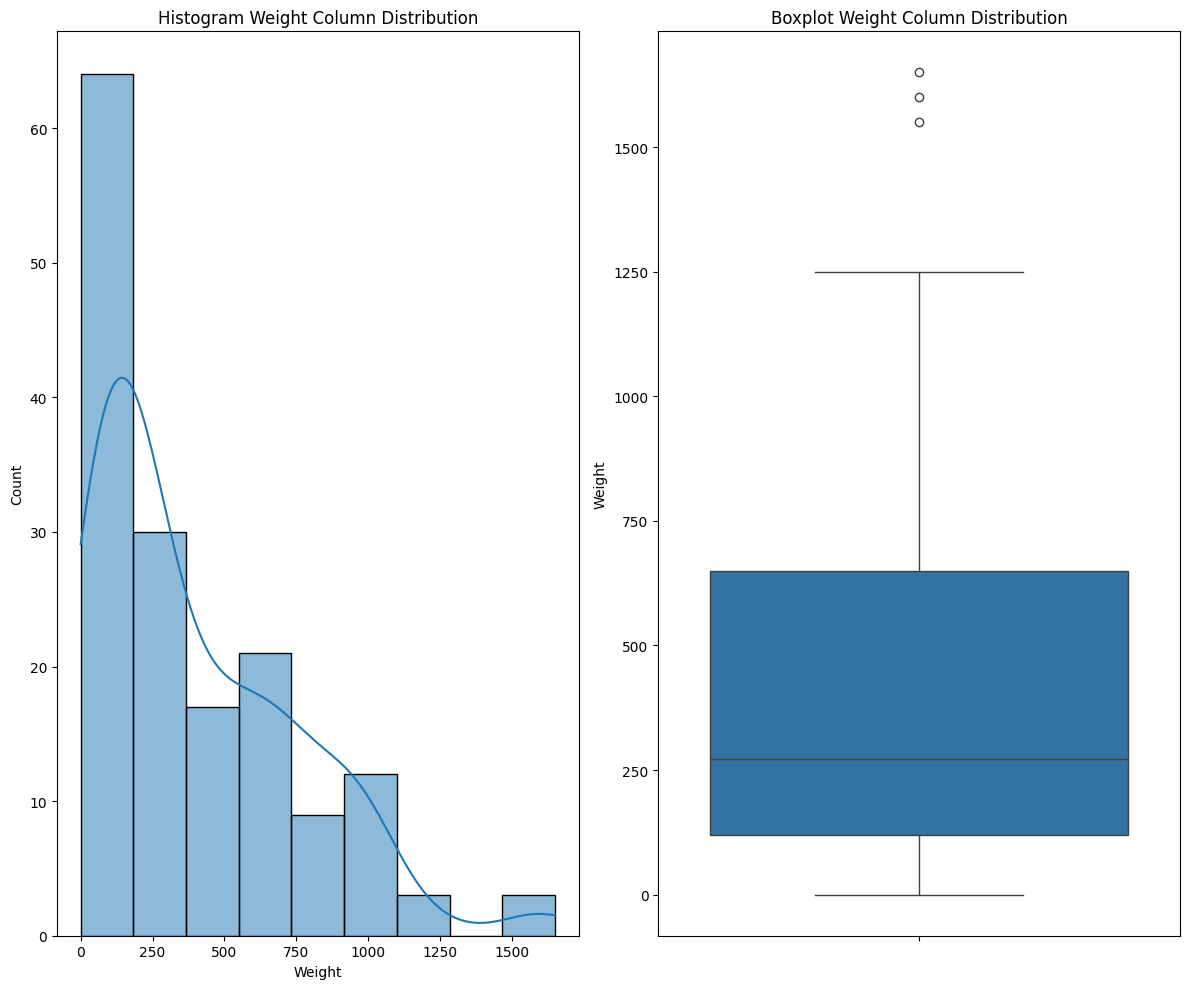

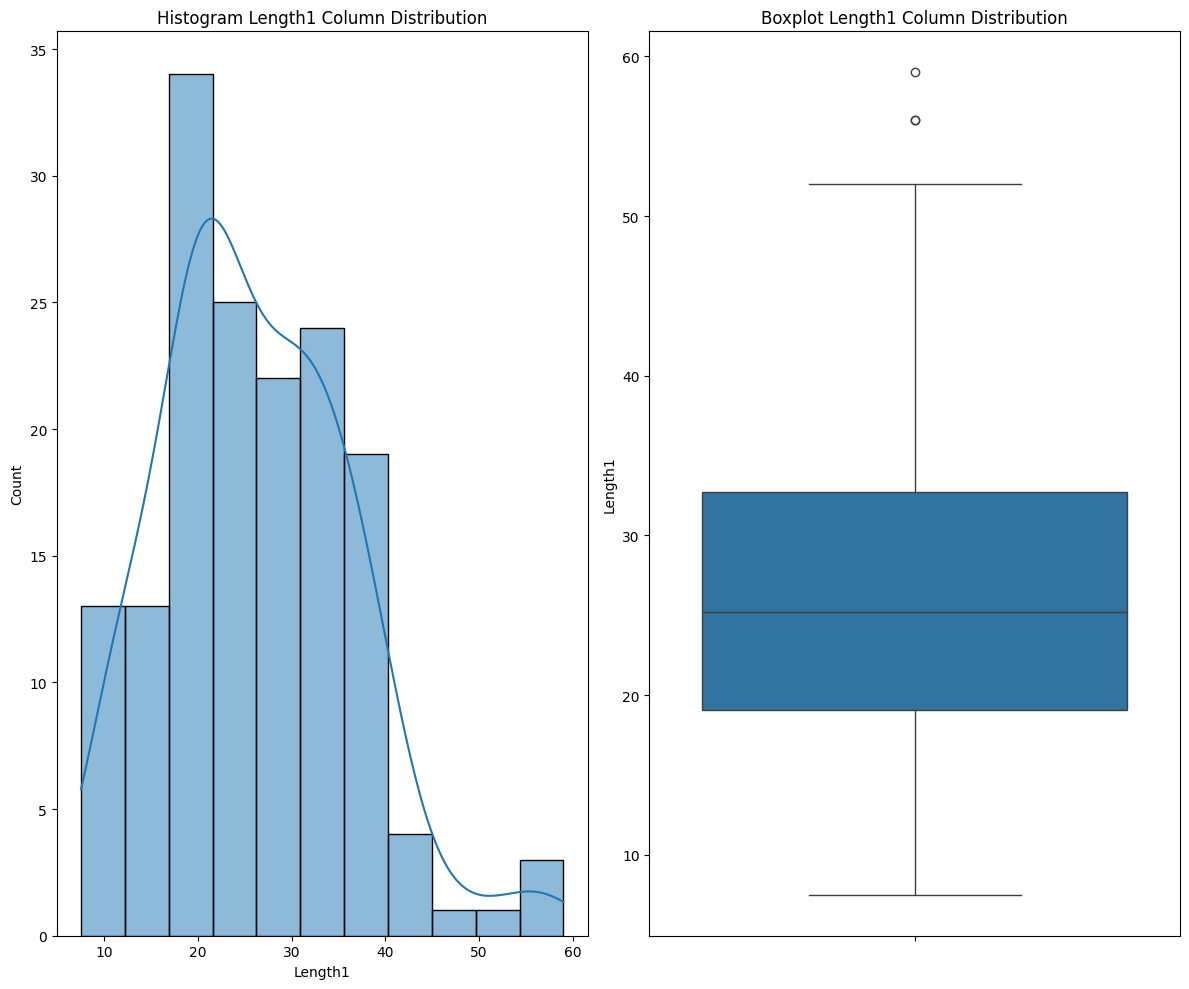

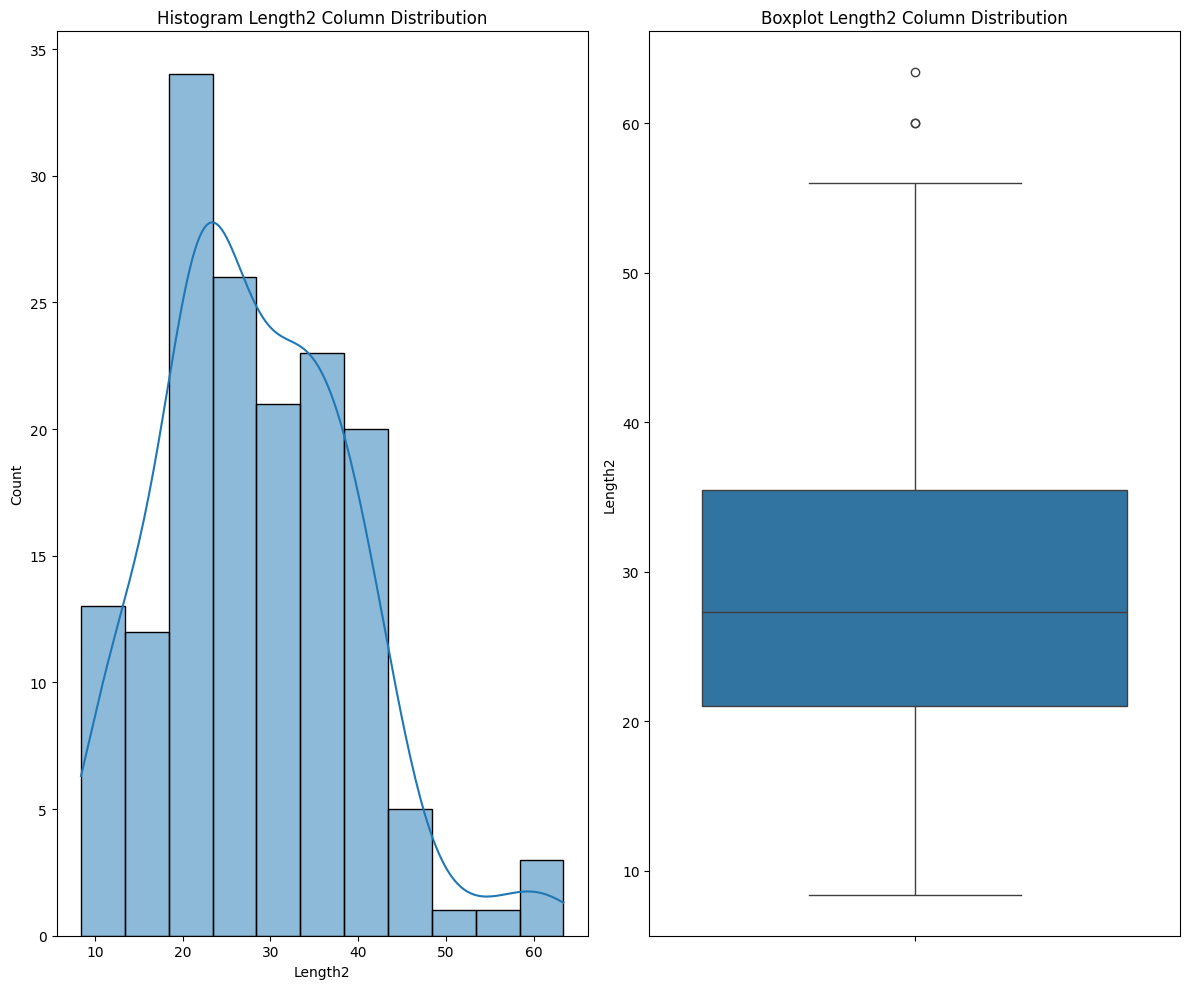

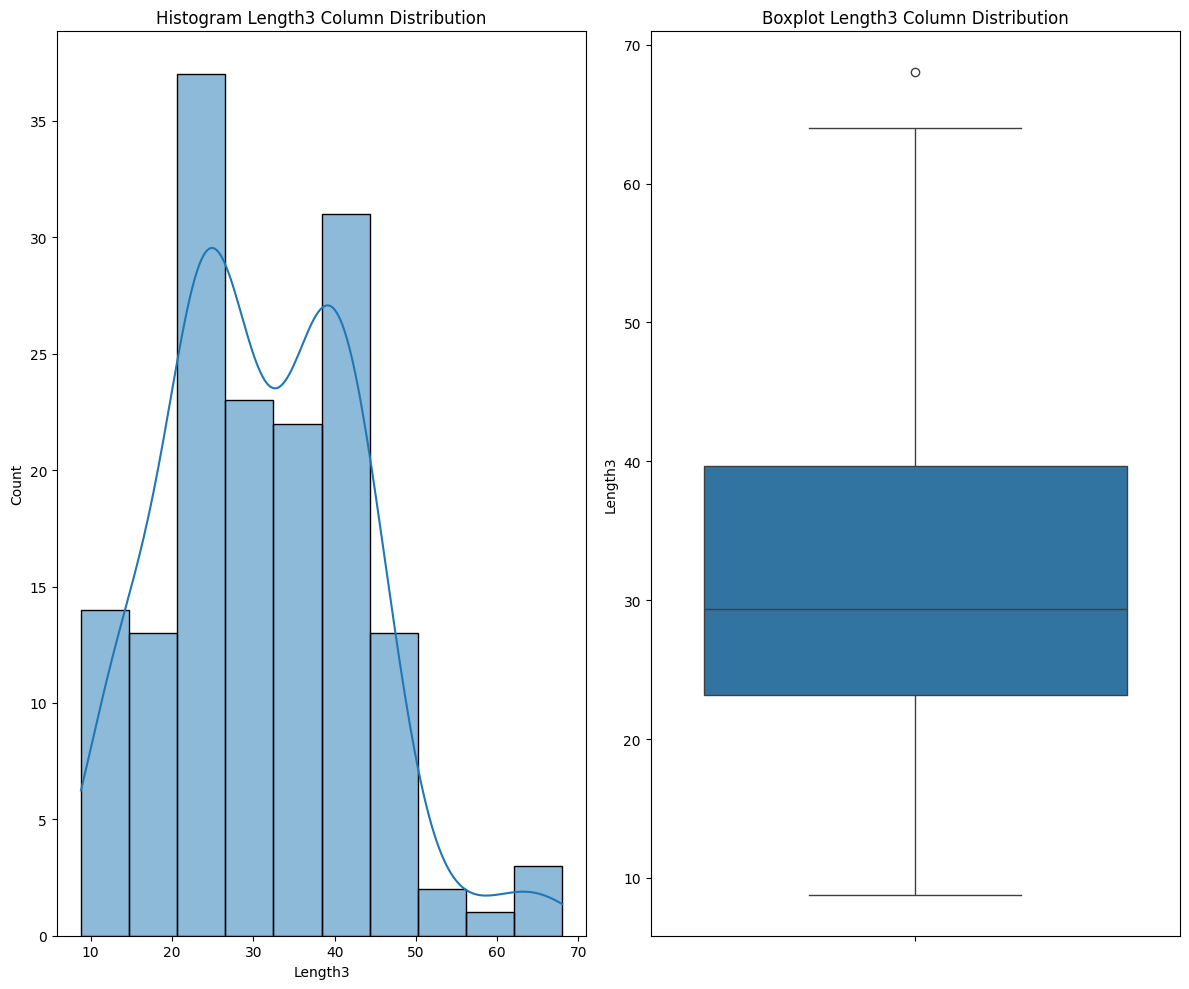

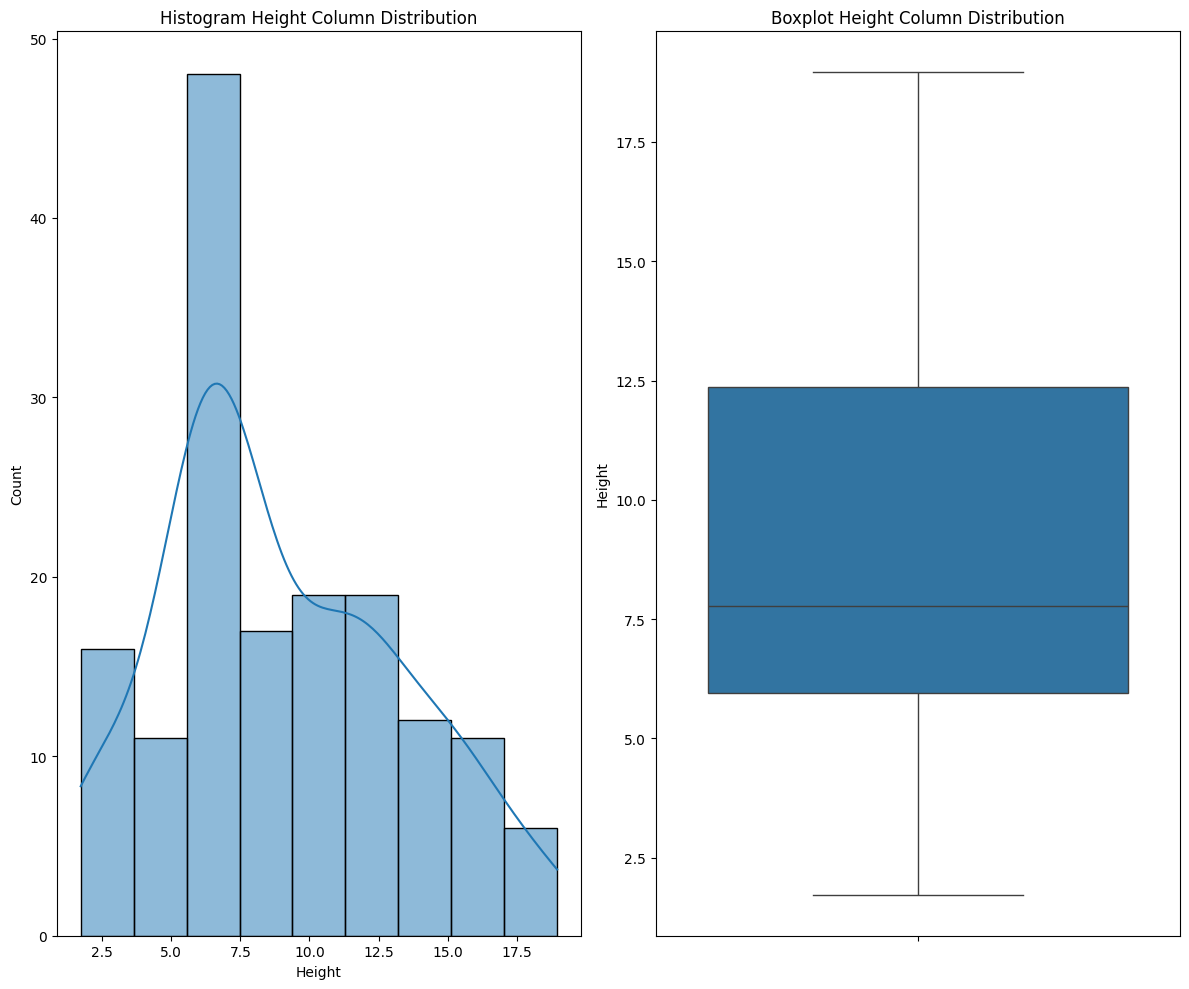

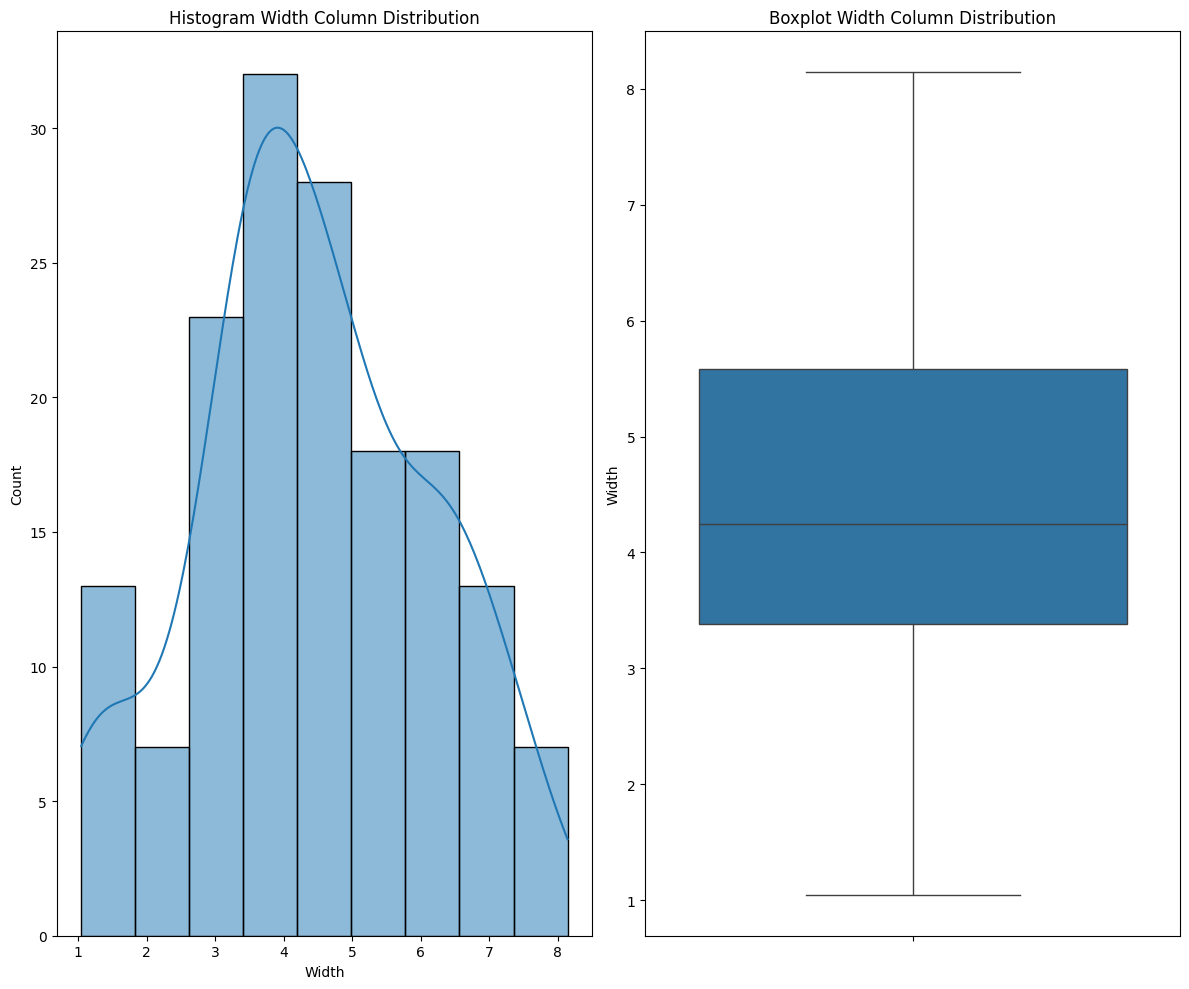

In [12]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 10))
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram {col} Column Distribution")
    
    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot {col} Column Distribution")
    plt.tight_layout()

## B. Data Preprocessing

### B.1 Handling Outliers

In [13]:
num = df.select_dtypes(include=['number']).columns

for col in num:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    up = q3 + 1.5 * iqr
    
    df = df[(df[col] >= low) & (df[col] <= up)]

### B.2 Finding Best Feature For Modelling

In [14]:
df_clean = df[['Length1', 'Weight']].copy()

In [15]:
df_clean.head()

,Length1,Weight
0,23.2,242.0
1,24.0,290.0
2,23.9,340.0
3,26.3,363.0
4,26.5,430.0


### B.3 Feature Engineering

#### Adding New Column

Length_Squared

In [16]:
df_clean['Length1_Squared'] = df_clean['Length1'] ** 2

## C. Exploratory Data Analysis

## D. Modelling

### D.1 Defining X (Features) and y (Target) Variables

In [17]:
X_data = df_clean[['Length1', 'Length1_Squared']].values
y_data = df_clean['Weight'].values.reshape(-1, 1)

### D.2 Splitting Train Data and Test Data (80:20)

In [19]:
# 1. Shuffle Data
np.random.seed(42)
indices = np.random.permutation(len(X_data))

# 2. Train & Test Length
test_size = int(len(X_data) * 0.2)

# 3. Splitting Index
test_idx = indices[:test_size]
train_idx = indices[test_size:]

# 4. Making X & y Variables
X_train, X_test = X_data[train_idx], X_data[test_idx]
y_train, y_test = y_data[train_idx], y_data[test_idx]

### D.3 Feature Scaling

#### Standard Scale Continous Data (Non-Categorical)

Text(0.5, 1.0, 'Features Before Standard Scaling')

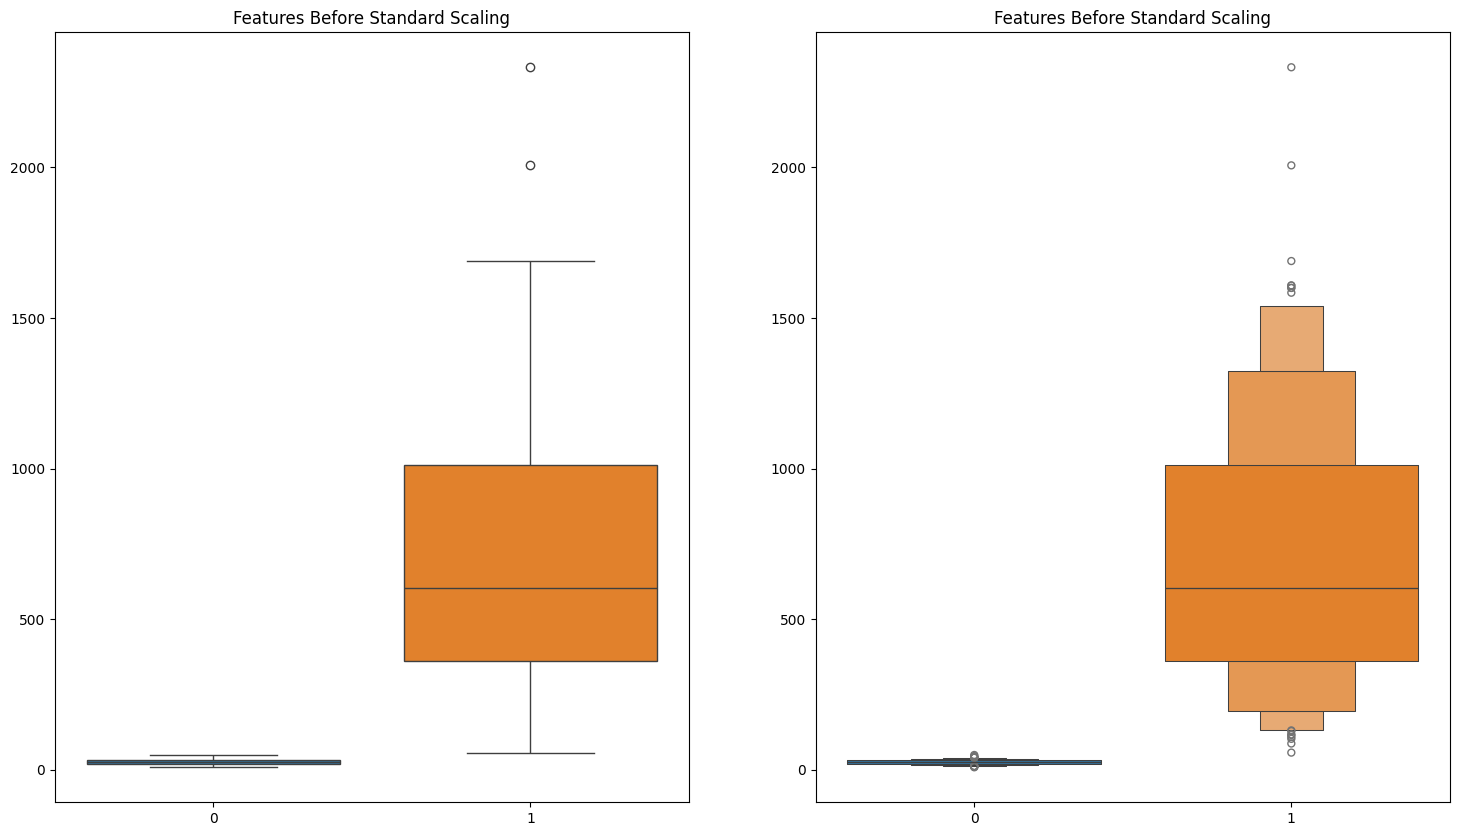

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

sns.boxplot(X_train, ax=axes[0])
axes[0].set_title("Features Before Standard Scaling")

sns.boxenplot(X_train, ax=axes[1])
axes[1].set_title("Features Before Standard Scaling")

In [23]:
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

Text(0.5, 1.0, 'Features After Standard Scaling')

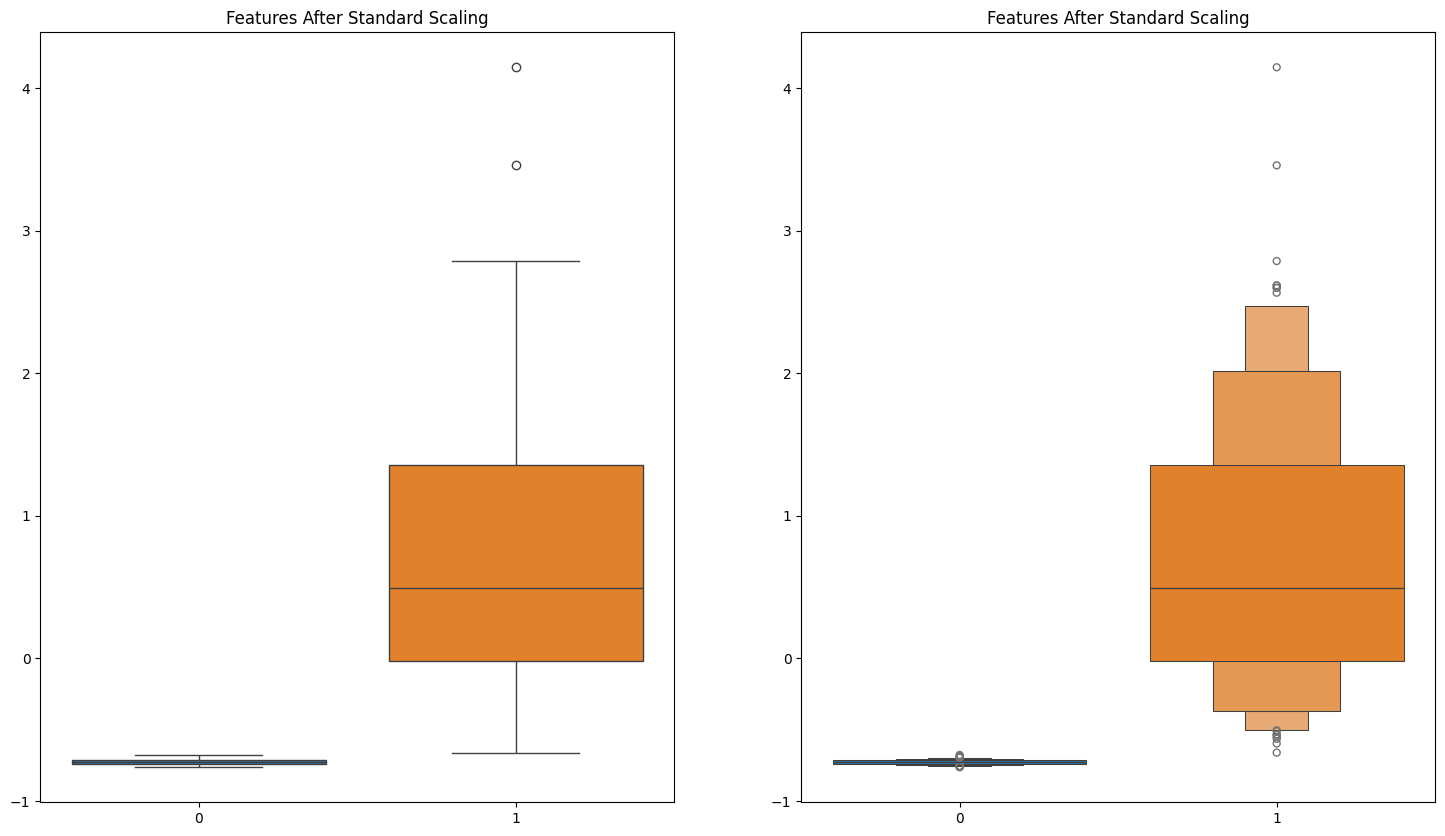

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

sns.boxplot(X_train, ax=axes[0])
axes[0].set_title("Features After Standard Scaling")

sns.boxenplot(X_train, ax=axes[1])
axes[1].set_title("Features After Standard Scaling")

### D.4 Matrix Modification (Add Bias)

## E. Evaluation